In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns

df= pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#replacing blanks with 0 as tenure is 0 and n0 total charges are recorded

In [5]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.isnull().sum().sum()

np.int64(0)

In [12]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [14]:
df["customerID"].duplicated().sum()

np.int64(0)

In [61]:
def conv(value):
    if value == 1:
        return "yes"
    else:
        return "no"
df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)

In [ ]:
converted 0 and 1 values of senior citizen to yes/no to make it easier to understand

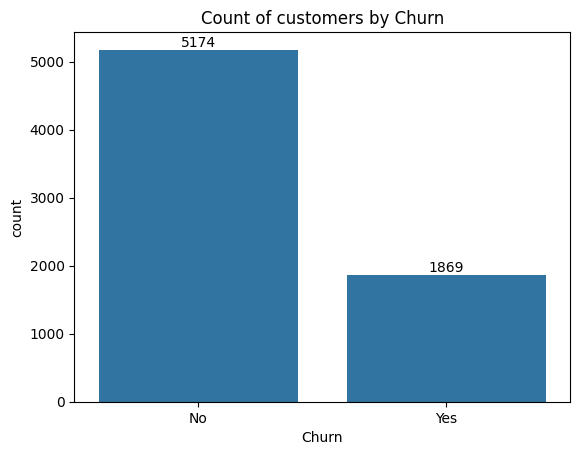

In [46]:
ax = sns.countplot(x='Churn', data = df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

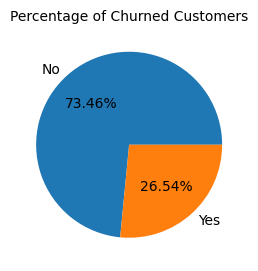

In [50]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':"count"})
plt.pie(gb['Churn'],labels= gb.index,autopct="%1.2f%%")
plt.title("Percentage of Churned Customers",fontsize = 10)
plt.show()

#from the given pie chart we can conclude that 26.54% of our customers have churned out.
#now lets explore the reason behind it.

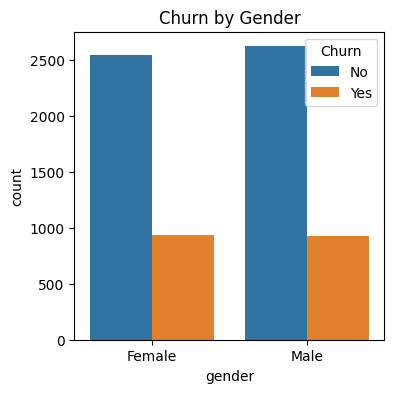

In [59]:
plt.figure(figsize=(4,4))
sns.countplot(x = "gender",data = df,hue = "Churn")
plt.title("Churn by Gender")
plt.show()

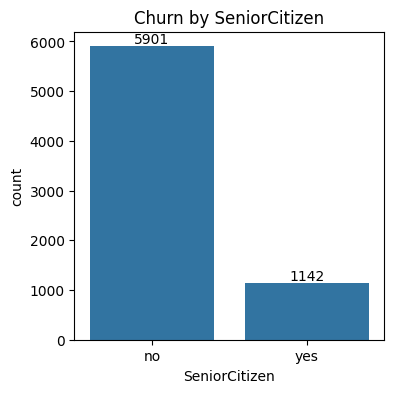

In [66]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "SeniorCitizen",data = df)
ax.bar_label(ax.containers[0])
plt.title("Churn by SeniorCitizen")
plt.show()

#comparative a greated percentage of people in senior citizen category have churned

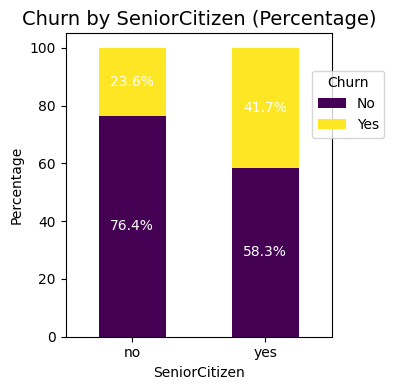

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate percentages
grouped = df.groupby(["SeniorCitizen", "Churn"]).size().unstack(fill_value=0)
percentages = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot stacked bar chart
percentages.plot(kind="bar", stacked=True, figsize=(4, 4), colormap="viridis")

# Add labels
for i, category in enumerate(percentages.index):
    for j, value in enumerate(percentages.loc[category]):
        if value > 0:  # Only label non-zero values
            plt.text(i, sum(percentages.loc[category][:j]) + value / 2, f"{value:.1f}%", 
                     ha="center", va="center", color="white", fontsize=10)

# Customize plot
plt.title("Churn by SeniorCitizen (Percentage)", fontsize=14)
plt.xlabel("SeniorCitizen")
plt.ylabel("Percentage")
plt.xticks(rotation=0)
plt.legend(title="Churn", bbox_to_anchor=(0.9, 0.9), loc="upper left")
plt.tight_layout()
plt.show()


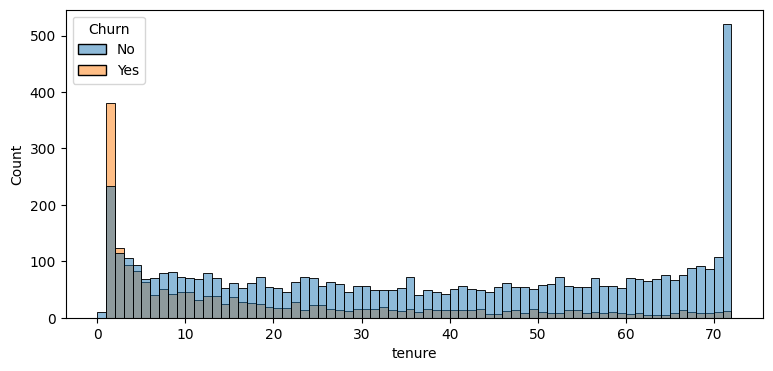

In [71]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure",data=df,bins=72,hue="Churn")
plt.show()

#People who have used our services for a long time have stayed and people who have used our services #1 or 2 months have churned

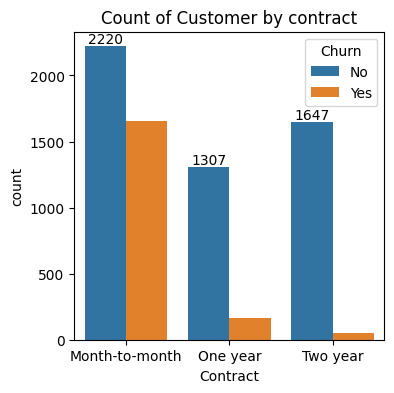

In [73]:
plt.figure(figsize=(4,4))
ax = sns.countplot(x = "Contract",data = df,hue ="Churn")
ax.bar_label(ax.containers[0])
plt.title("Count of Customer by contract")
plt.show()

#People who have month to month contract are likely to return then from those who have 1 or 2 years or contract

In [74]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

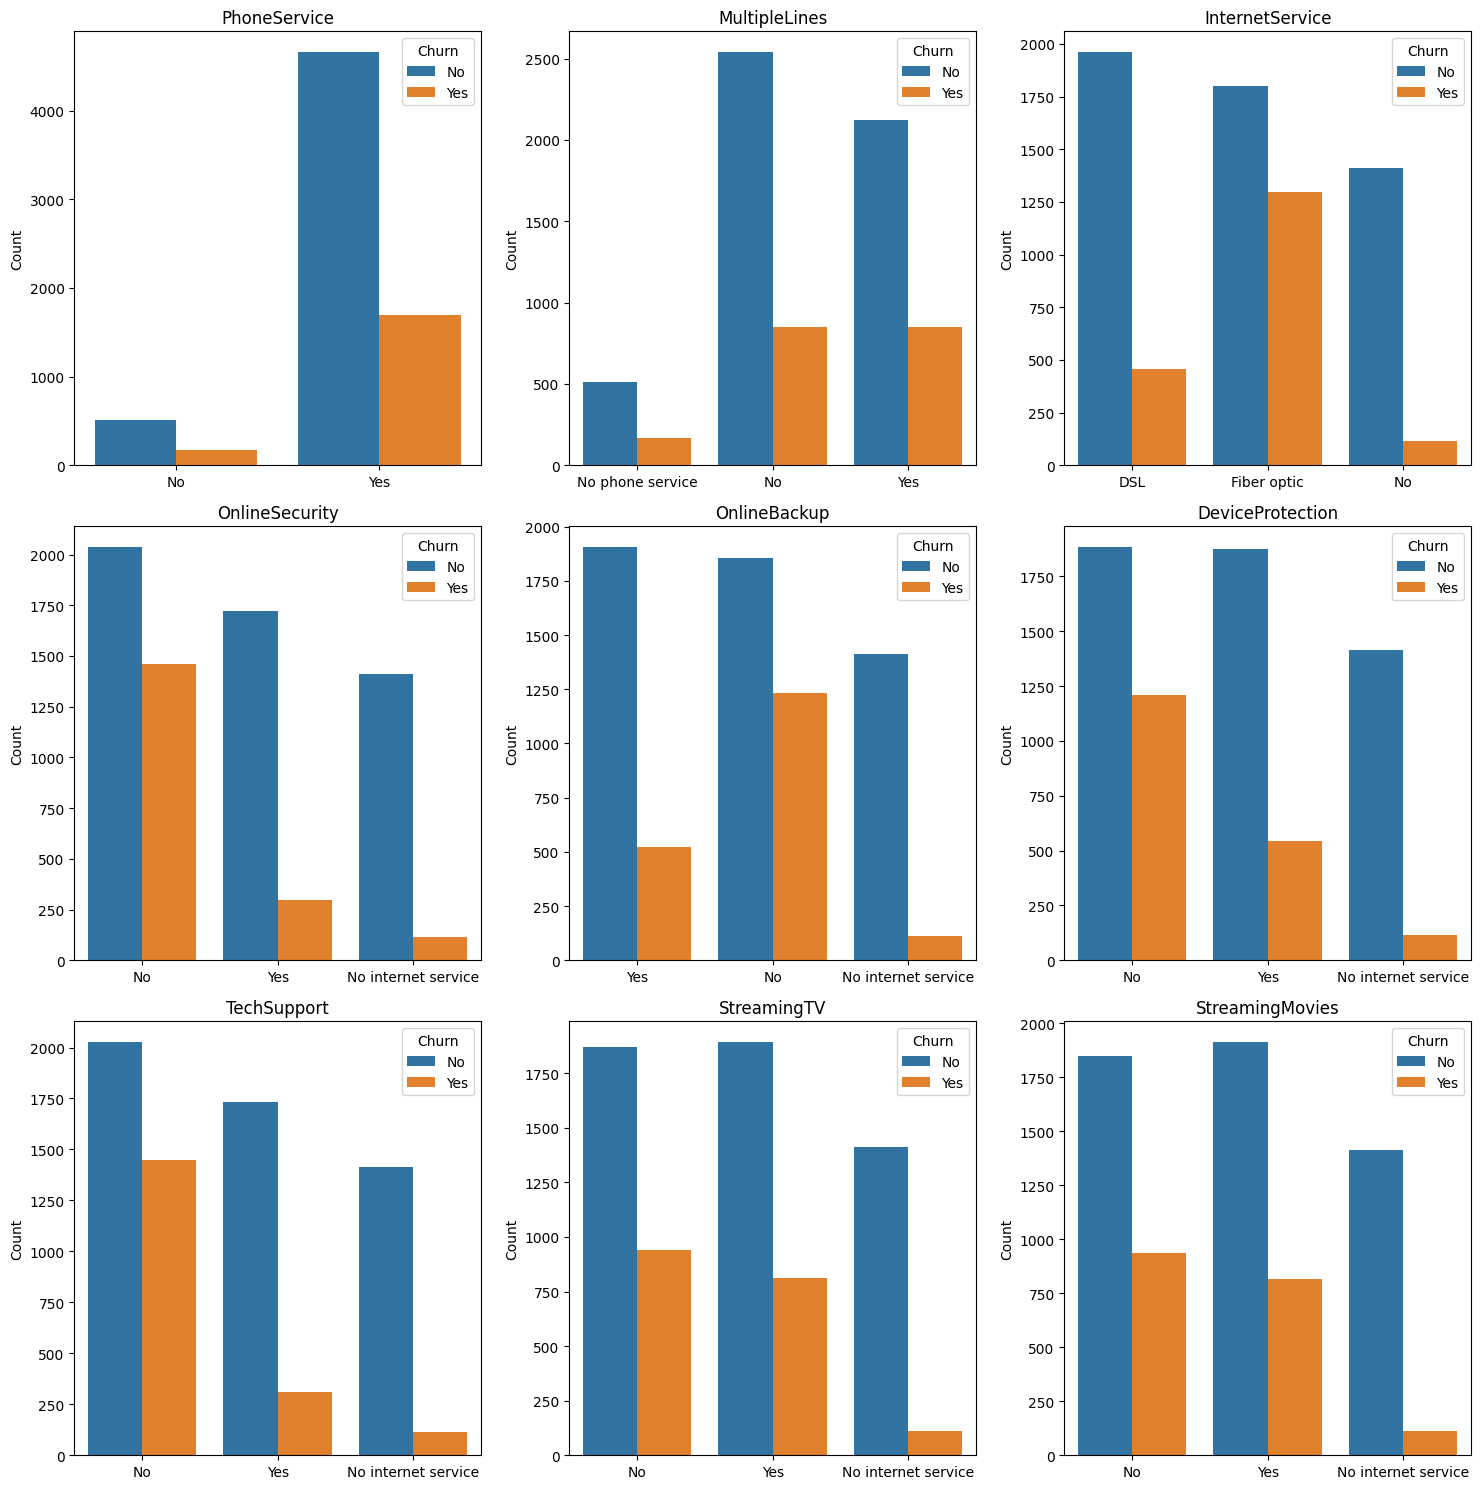

In [77]:


# Assuming your data is in a pandas DataFrame named 'df'
columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

# Set up the number of rows and columns for subplots
n_cols = 3  # Number of columns per row
n_rows = -(-len(columns) // n_cols)  # Calculate rows needed (ceil)

# Create a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=df["Churn"])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")

# Turn off any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


#The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like OnlineBackup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

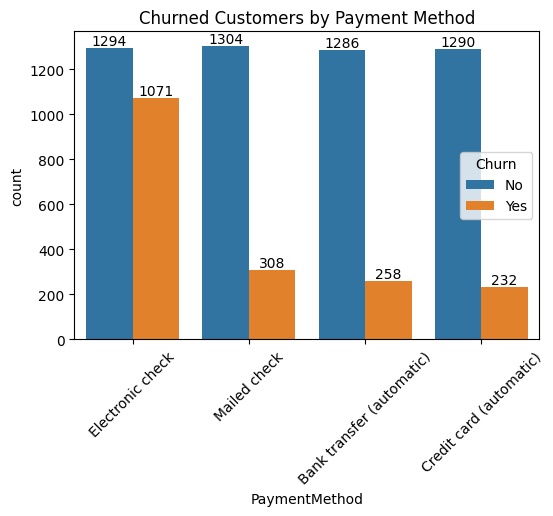

In [80]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x = "PaymentMethod",data = df,hue ="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method")
plt.xticks(rotation = 45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.